### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error as rmse

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [2]:
student_df = pd.read_csv(r"student_dataset\student-math.csv", sep=";")

### Getting insights from the data

In [3]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
student_df = student_df.dropna() ## though there was no NaN value in the dataset, but ran this to be sure 

In [5]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

##### **Space for getting insights from the data**

In [6]:
student_df.value_counts("Walc", sort=0)


Walc
1    151
2     85
3     80
4     51
5     28
Name: count, dtype: int64

### Preprocessing

##### **Data Cleaning**

In [7]:
# Transform list of UCI dataset
transform= ['absences']

## Log Transform
for col in transform:
    if col in student_df.columns:
        student_df[col] = np.log1p(student_df[col])


In [8]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,1.945910,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,1.609438,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,2.397895,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,1.098612,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,1.609438,6,10,10


In [9]:
# let's count what to drop and what to encode
# Expected Drop list of UCI dataset
Drops= [] 

# Expected One Hot Encoded list of UCI dataset
encode_one_hot= ['guardian', 'school', 'Fjob', 'Mjob', 'reason']

# Already Label Encoded list of UCI dataset 
label_encoded = ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel','freetime','goout', 'Walc', 'Dalc','health']

# Expected binarize list of UCI dataset
Binarize= ['address', 'sex', 'higher', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'romantic', 'nursery', 'internet', 'famsize']


# Targets
Targets= ['G3']

# see if all cols are counted in
len(encode_one_hot+label_encoded+Binarize+Targets)
## output= 31 | yes everything is there

29

##### **Using sklearn Label Encoder to binarize**

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in Binarize:
    student_df[col] = le.fit_transform(student_df[col])


# see if they are binarized well
# pd.DataFrame(student_df.value_counts(Binarize))

# student_df.value_counts("address") ## debugging

##### **Using `pandas.get_dummies()` for One-Hot Encoding**

In [11]:
student_df_1hot = pd.get_dummies(student_df[encode_one_hot])

In [12]:
student_df_1hot.head()

,guardian_father,guardian_mother,guardian_other,school_GP,school_MS,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation
0,False,True,False,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False
1,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False
2,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False
3,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False
4,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False


In [13]:
student_df_1hot = student_df_1hot.astype(int) # converting booleans to integers

##### **Getting the processed dataframe**

In [14]:
student_df_mod = student_df.drop(columns=encode_one_hot)

student_df_mod = pd.concat([student_df_mod, student_df_1hot], axis=1)

In [15]:
# student_df_mod.isna().sum() # check for missing values
student_df_mod.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_teacher,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation
0,0,18,1,0,0,4,4,2,2,0,...,1,1,0,0,0,0,1,0,0,0
1,0,17,1,0,1,1,1,1,2,0,...,0,1,0,0,0,0,1,0,0,0
2,0,15,1,1,1,1,1,1,2,3,...,0,1,0,0,0,0,0,0,1,0
3,0,15,1,0,1,4,2,1,3,0,...,0,0,1,0,0,0,0,1,0,0
4,0,16,1,0,1,3,3,1,2,0,...,0,0,0,1,0,0,0,1,0,0


##### **Splitting the features and targets**

In [16]:
student_df_target = student_df_mod[Targets]
student_df_features = student_df_mod.drop(Targets, axis=1)

In [17]:
student_df_target.tail()

,G3
390,9
391,16
392,7
393,10
394,9


In [18]:
student_df_features.tail()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_teacher,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation
390,1,20,1,1,0,2,2,1,2,2,...,0,0,0,0,1,0,1,0,0,0
391,1,17,1,1,1,3,1,2,1,0,...,0,0,0,0,1,0,1,0,0,0
392,1,21,0,0,1,1,1,1,1,3,...,0,0,0,1,0,0,1,0,0,0
393,1,18,0,1,1,3,2,3,1,0,...,0,0,0,0,1,0,1,0,0,0
394,1,19,1,1,1,1,1,1,1,0,...,0,0,0,1,0,0,1,0,0,0


### **Performing Principal Component Analysis (PCA)**

In [19]:
from sklearn.decomposition import PCA

pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])

In [20]:
student_df_pca = pca_pipeline.fit_transform(student_df_features)

In [21]:
pd.DataFrame(student_df_pca).head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.142149,-0.745835,-0.521975,1.190199,2.873276,-2.148821,-1.465197,2.195010,-0.743315,-3.434878,...,0.369902,0.180203,0.330873,0.621363,-0.521584,1.103962,0.063537,1.079012,1.149573,-0.741735
1,-2.018094,-2.675667,0.151607,-1.426930,1.701092,0.424546,-0.569968,-0.204348,0.561434,0.667573,...,0.151659,0.220147,1.359105,-0.857570,-0.736161,-0.357047,0.564459,-0.433856,1.107851,0.026917
2,-2.035774,-1.480485,-1.441402,-0.500410,0.528224,-1.802709,1.049562,-0.998534,-3.343032,-0.356073,...,0.857668,0.874335,-0.405046,1.341044,-1.876094,0.147821,2.150452,-0.803855,-1.151986,1.948971
3,3.169894,-0.476380,1.371276,-0.510775,-0.475810,-0.994003,0.554951,0.379313,-1.567330,1.798432,...,0.596329,-0.305029,0.636396,0.585291,-0.094903,0.135221,-0.049042,0.666811,0.290265,0.326383
4,0.216667,-1.863702,-0.042314,-1.541357,-0.575369,1.197436,-2.385328,1.150799,-1.128746,0.575902,...,0.089892,-1.000412,0.607329,-0.452359,0.219764,-0.620736,-0.388067,0.670003,-0.685667,0.306733


##### **Analysing the Explained Variance Ratio**

In [22]:
# Check explained variance ratio
print("Explained variance ratio:", pca_pipeline.named_steps['pca'].explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(pca_pipeline.named_steps['pca'].explained_variance_ratio_))

Explained variance ratio: [0.08684118 0.05952712 0.05345534 0.04837253 0.04422878 0.04224145
 0.03780079 0.03541966 0.03338035 0.0320618  0.03009955 0.02943475
 0.02857389 0.02729669 0.02580204 0.02541509 0.02383627 0.02275659
 0.0222929  0.02155492 0.02148126 0.0189508  0.01862075 0.01795574
 0.01735162 0.01643464 0.01520297 0.01484486 0.01462057 0.01426009
 0.01323916 0.01272279 0.01193098 0.01135479 0.0107371 ]
Cumulative explained variance: [0.08684118 0.1463683  0.19982363 0.24819617 0.29242494 0.3346664
 0.37246718 0.40788684 0.44126719 0.47332899 0.50342854 0.5328633
 0.56143719 0.58873387 0.61453592 0.63995101 0.66378728 0.68654386
 0.70883676 0.73039168 0.75187294 0.77082375 0.78944449 0.80740023
 0.82475186 0.8411865  0.85638947 0.87123433 0.8858549  0.90011499
 0.91335414 0.92607693 0.93800792 0.9493627  0.9600998 ]


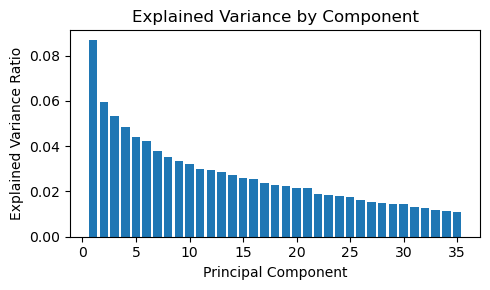

In [23]:
# Plot explained variance ratio
plt.figure(figsize=(5,3))
plt.bar(range(1, len(pca_pipeline.named_steps['pca'].explained_variance_ratio_) + 1), pca_pipeline.named_steps['pca'].explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')
plt.tight_layout()


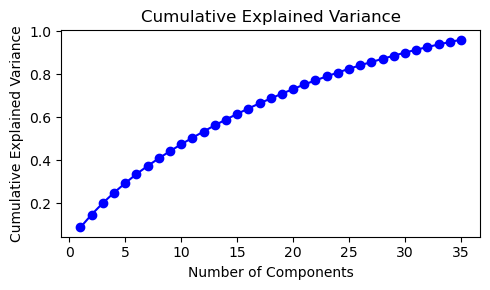

In [24]:
## Cumulative Explained Variance
plt.figure(figsize=(5,3))
plt.plot(range(1, len(pca_pipeline.named_steps['pca'].explained_variance_ratio_) + 1), np.cumsum(pca_pipeline.named_steps['pca'].explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.tight_layout()
plt.show()

#### **Using the Top 95%ile PCs as the features**

In [25]:
student_df_features = student_df_pca

### Splitting the data into training, validation and testing sets

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(student_df_features, student_df_target, test_size=0.1, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [27]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape # they are split well

((319, 35), (319, 1), (40, 35), (40, 1), (36, 35), (36, 1))

### Training the models

#### **Performing Cross Validation using GridSearchCV**

In [28]:
y_train = np.array(y_train).ravel()

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Using GridSearchCV on the Linear Regression
grid_lin = GridSearchCV(LinearRegression(), {
    'fit_intercept': [True, False], 'copy_X': [True, False]
    }, cv=5)

## Using GridSearchCV on the Polynomial Regression Pipeline
poly_pipe_cv = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())])

grid_lin_poly = GridSearchCV(poly_pipe_cv, param_grid={'poly__degree': [1, 2, 3]}, cv=5)


## Using RandomizedSearchCV on the Decision Tree
tree_cv = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), {
    "max_depth": [3, None],
    "max_features": [1, 2, 3, 4, 5, 6, 7, 8],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8],
    "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"]
}, cv=5)

## Fit the CV models on the training data
grid_lin.fit(X_train, y_train)
grid_lin_poly.fit(X_train, y_train)
tree_cv.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [3, None],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7,
                                                         8],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8]})

#### **Getting the Best parameters for all the models after Cross Validation**

In [30]:
print(f'Tuned Linear Regression: {grid_lin.best_params_}\nBest score is {grid_lin.best_score_}\n')
print(f'Tuned Polynomial Regression: {grid_lin_poly.best_params_}\nBest score is {grid_lin_poly.best_score_}\n')

print(f'Tuned Decision_tree: {tree_cv.best_params_}\nBest score is {tree_cv.best_score_}\n')

Tuned Linear Regression: {'copy_X': True, 'fit_intercept': True}
Best score is 0.7784422843262693

Tuned Polynomial Regression: {'poly__degree': 1}
Best score is 0.7784422843262695

Tuned Decision_tree: {'min_samples_leaf': 4, 'max_features': 2, 'max_depth': 3, 'criterion': 'friedman_mse'}
Best score is -0.02736363704051068



#### **Fitting Linear Regression Model to the dataset**

In [31]:
## We'll be using the best parameter values we found in CV before setting the random_state to 42

In [32]:
lin_reg_pipe = Pipeline([('scaler', StandardScaler()), ('regressor', LinearRegression(copy_X=True,fit_intercept=True))])

lin_reg_pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

##### **Comparing the Scores of the training and validation sets**

In [33]:
#scores are very similar
print(f"Train score (Linear Regression): {lin_reg_pipe.score(X_train, y_train)}")
print(f"Validation score (Linear Regression): {lin_reg_pipe.score(X_val, y_val)}")

Train score (Linear Regression): 0.8371145557941051
Validation score (Linear Regression): 0.85843218127486


##### **Comparing the RMSEs of the training and validation sets**

In [34]:
lin_reg_train_pred = lin_reg_pipe.predict(X_train)
lin_reg_val_pred = lin_reg_pipe.predict(X_val)

lin_reg_train_rmse = rmse(y_train, lin_reg_train_pred)
lin_reg_val_rmse = rmse(y_val, lin_reg_val_pred)

lin_reg_train_rmse, lin_reg_val_rmse ## RMSEs are very similar

(1.8350754247451284, 1.607633841133619)

##### **Overfitting Detector for Debugging**

In [35]:
# Check for overfitting by comparing train vs test scores
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def check_overfitting(model, X_train, X_test, y_train, y_test):
    # Training scores
    train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    
    # Test scores
    test_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    print(f"Training R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")
    print(f"Training RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f}")
    print(f"R² Difference: {train_r2 - test_r2:.4f}")
    
    if train_r2 - test_r2 > 0.1:
        print("⚠️ OVERFITTING DETECTED!")
    
    return test_pred

# # Check your current model
model = lin_reg_pipe
model.fit(X_train, y_train)
predictions = check_overfitting(model, X_train, X_test, y_train, y_test)

Training R²: 0.8371 | Test R²: 0.7183
Training RMSE: 1.8351 | Test RMSE: 2.6373
R² Difference: 0.1188
⚠️ OVERFITTING DETECTED!


#### **Fitting an Polynomial regression model to the dataset**

In [36]:
print(f'Tuned Polynomial Regression: {grid_lin_poly.best_params_}\n')
## This value will give the same result as the linear regression model, as the dregree=1

Tuned Polynomial Regression: {'poly__degree': 1}



In [37]:
## Fitting a Polynomial Regression Model with Degree=2 to see te level of overfitting
poly_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])
poly_pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('linear', LinearRegression())])

In [38]:
poly_pipe.score(X_train, y_train), poly_pipe.score(X_val, y_val) # Highly overfitting

(1.0, 0.4170417913383272)

#### **Fitting Decision Tree Regressor to the data set**

In [39]:
print(f'Tuned Decision_tree: {tree_cv.best_params_}\n')

Tuned Decision_tree: {'min_samples_leaf': 4, 'max_features': 2, 'max_depth': 3, 'criterion': 'friedman_mse'}



In [40]:
tree_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeRegressor(
        max_depth=3,
        min_samples_leaf=6,
        max_features=2,
        criterion='friedman_mse', random_state=42))])

tree_pipe.fit(X_train, y_train)

tree_pipe.score(X_train, y_train), tree_pipe.score(X_val, y_val) ## Overfitting


(0.1488501464780535, -0.08057369704375938)

In [41]:
## Looking for the overfitting
model = tree_pipe
model.fit(X_train, y_train)
predictions = check_overfitting(model, X_train, X_test, y_train, y_test)

Training R²: 0.1489 | Test R²: 0.0699
Training RMSE: 4.1948 | Test RMSE: 4.7926
R² Difference: 0.0790


In [42]:
tree_train_pred = tree_pipe.predict(X_train)
tree_val_pred = tree_pipe.predict(X_val)

tree_train_rmse = rmse(y_train, tree_train_pred)
tree_val_rmse = rmse(y_val, tree_val_pred)

tree_train_rmse, tree_val_rmse ## Get the RMSEs for the upcoming steps

(4.194843812594073, 4.4415245332042295)

#### Trying the other linear models to fit the data

#### **Fitting Ridge Regression models to the training set**

In [43]:
## As the Linear Regression model is the best model for this dataset, lets try the Ridge Regression model

from sklearn.linear_model import RidgeCV
import numpy as np

## Using RandomizedSearchCV to find the best alpha value for the Ridge Regression model
alphas = np.logspace(-3, 2, 100)
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)
print("Best alpha:", ridge_cv.alpha_)
print("Val score:", ridge_cv.score(X_val, y_val))


Best alpha: 19.630406500402724
Val score: 0.8679341816922541


In [44]:
## Fitting Ridge Regression to the Training set with the best alpha from CV
ridge_pipeline = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha=19, copy_X=True, fit_intercept=True, random_state=42, tol=0.001))])

lin_reg_pipe.fit(X_train, y_train)
ridge_pipeline.fit(X_train, y_train)

print("Train score (Ridge):", ridge_pipeline.score(X_train, y_train))
print("Validation score (Ridge):", ridge_pipeline.score(X_val, y_val))

Train score (Ridge): 0.8342468407256938
Validation score (Ridge): 0.8659911168967518


#### **Fitting ElasticNet Regression model to the training set**

In [45]:
from sklearn.linear_model import ElasticNet

param_dist = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

e_net_cv = RandomizedSearchCV(ElasticNet(), param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

print(f"Best parameters: {e_net_cv.set_params().fit(X_train, y_train).best_params_}")

Best parameters: {'l1_ratio': 0.1, 'alpha': 0.1}


In [46]:
e_net_pipe = Pipeline([('scaler', StandardScaler()), ('elasticnet', ElasticNet(alpha=0.1, l1_ratio=0.1))])

e_net_pipe.fit(X_train, y_train)

print("Training score (ElasticNet):", e_net_pipe.score(X_train, y_train))
print("Validation score (ElasticNet):", e_net_pipe.score(X_val, y_val))

Training score (ElasticNet): 0.8294319118793017
Validation score (ElasticNet): 0.8664771757914584


## Using Ensemble Methods

#### Using Bagging and Voting Regression to improve the performance

In [47]:
## Voting Regressor
vote_reg = VotingRegressor(
    estimators=[
        ('lr', LinearRegression(fit_intercept=True)),
        ('ridge', Ridge(alpha=19.63, random_state=42)),
        ('e_net', ElasticNet(alpha=0.1, l1_ratio=0.1, random_state=42)),
    ]
)
vote_reg.fit(X_train, y_train)
print(f'R2 score: {vote_reg.score(X_val, y_val)}')

R2 score: 0.8669679473026979


##### Using Cross Validation to find the best parameters for Bagging Regressor

In [48]:
## Using RandomizedSearchCV
bag_dist = {
    'n_estimators': np.arange(50, 150, 10),
    'max_samples': np.arange(0.1, 1.0, 0.1),
    'max_features': np.arange(0.1, 1.0, 0.1),
    'bootstrap': [True, False]
}

bag_cv = RandomizedSearchCV(
    estimator=BaggingRegressor(),
    param_distributions=bag_dist,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42,
)

bag_cv.fit(X_train, y_train)
print(bag_cv.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': np.int64(130), 'max_samples': np.float64(0.7000000000000001), 'max_features': np.float64(0.5), 'bootstrap': False}


#### Using Bagging Regressor (Pasting)

In [49]:
bag_reg = BaggingRegressor(estimator=LinearRegression(), max_features=0.9, bootstrap=False, n_estimators=130, random_state=42)
bag_reg.fit(X_train, y_train)
bag_reg.score(X_val, y_val)

0.8713844990235394

## Using AdaBoost with Bagging Regressor

In [50]:
ada_reg = AdaBoostRegressor(
    estimator=bag_reg,
    n_estimators=100,
    learning_rate=0.7,
    loss='linear',
    random_state=42)

ada_reg.fit(X_train, y_train)
ada_reg.score(X_train, y_train), ada_reg.score(X_val, y_val)

(0.8171199960815976, 0.8716196413427579)

##Using Adaboost Regression as the final model

In [51]:
bag_reg.predict(X_test)
bag_reg.score(X_test,y_test)

0.7268131780568932

##### **Creating the Prediction dataframe**

In [52]:
# Reset indices to ensure proper alignment
X_test = pd.DataFrame(X_test).reset_index(drop=True)
y_test = pd.DataFrame(y_test).reset_index(drop=True)
# lin_reg_pred = test_pred.reset_index(drop=True)

In [53]:
test_pred = ada_reg.predict(X_test)

In [54]:
test_pred_df = test_pred
test_pred_df = pd.DataFrame(test_pred_df, columns=['G3_pred'])
test_pred_df = test_pred_df.reset_index(drop=True)
print(f'Shape of the prediction dataframe: {test_pred_df.shape}')
test_pred_df.head()


Shape of the prediction dataframe: (40, 1)


,G3_pred
0,9.533686
1,11.753771
2,1.899932
3,7.462243
4,9.633355


In [55]:
predictions_linreg_df = pd.concat([y_test, test_pred_df.round(2)], axis=1)

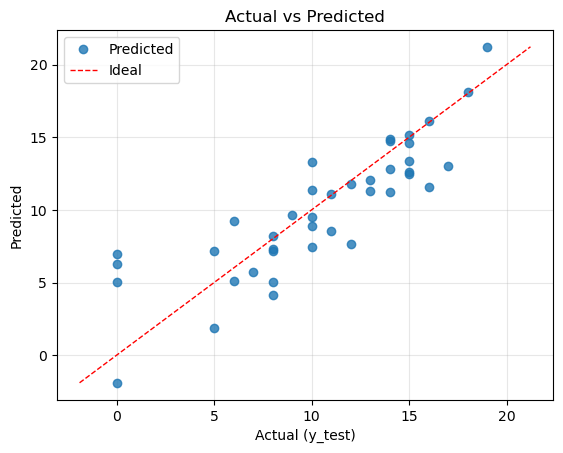

In [56]:
plt.clf()
# Create a scatter plot
# plt.scatter(y_test, test_pred_df, alpha=0.8, label='Predicted')
plt.plot(y_test, test_pred_df, 'o', alpha=0.8, lw=0.5, label='Predicted')

# Get the range that covers both actual and predicted values
max_sc = test_pred_df.max()
min_sc = test_pred_df.min()

# Plot the actual values
plt.plot([min_sc, max_sc], [min_sc, max_sc], 'r--', lw=1, label='Ideal')

plt.xlabel('Actual (y_test)')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


#### **The Student Performance Prediction dataframe**

In [59]:
random_indices = np.random.choice(len(X_test), size=10, replace=False)
# X_test.shape
predictions_linreg_df.iloc[random_indices]

,G3,G3_pred
30,8,7.19
33,13,12.05
38,14,12.78
29,10,11.38
13,10,13.31
11,7,5.73
39,8,7.33
25,19,21.22
22,16,11.56
7,6,9.23
